<a href="https://colab.research.google.com/github/Murakami-Shoya/everyday_programming/blob/master/AI_100knock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 教師あり学習

### データの概要

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [11]:
import pandas as pd
df = pd.DataFrame(housing.data, columns=housing.feature_names)

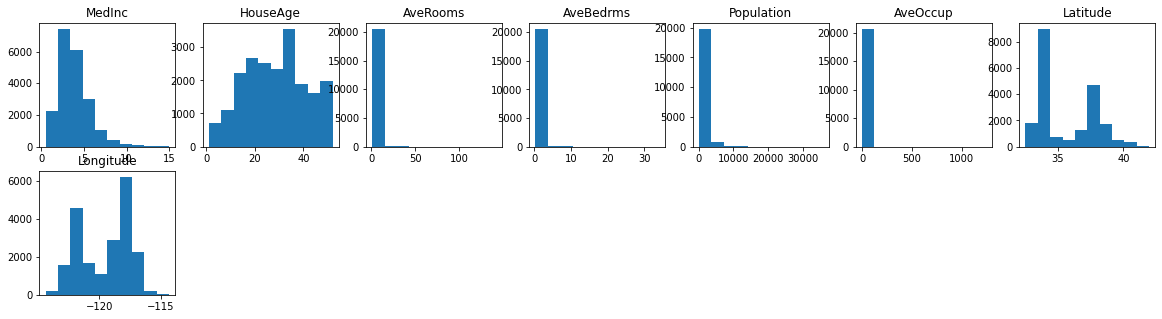

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 5))
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()